# Lab 1

*Przygotował:*
**Szymon Budziak**

---

In [ ]:
import pandas as pd
import numpy as np

# Analiza New York Times dataset

### Wczytanie danych

In [2]:
df = pd.read_csv('./data/nyt-frame.csv', header=0)
data = df.iloc[:, 9:]
header = list(df.columns.values[9:])
array = data.values

print(f'Shape of dataset: {data.shape}')
data.head()

Shape of dataset: (102, 4424)


,abandoned,abc,ability,able,about,above,abroad,absorbed,absorbing,abstract,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,0.0,0.0,0.0,0.000000,0.053266,0.000000,0.000000,0.0,0.0,0.021566,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.039866,0.000000,0.000000,0.000000,0.0,0.0,0.043458,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.053641,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.012511,0.000000,0.041018,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 20 losowych wybranych elementów słownika

In [3]:
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['renee' 'response' 'particularly' 'expansion' 'struggle' 'arranged'
 'ford' 'said' 'eager' 'hidden' 'night' 'change' 'mayor' 'expect'
 'masters' 'stare' 'name' 'network' 'sees' 'infrared']


### PCA

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA()
X_pca = pca.fit_transform(array)

### 15 elementów o największej wartości dla pierwszego komponentu

In [6]:
first_15_highest = pca.components_[0].argsort(axis=0)[::-1][:15]

for i in first_15_highest:
    print(f'{i}: {header[i]}')

3530: she
1794: her
2517: ms
1875: i
3394: said
2498: mother
875: cooper
2538: my
2761: painting
3013: process
2762: paintings
1899: im
2516: mrs
1771: he
2373: me


### 15 elementów o najmniejszej wartości dla pierwszego komponentu

In [7]:
first_15_lowest = pca.components_[0].argsort(axis=0)[:15]

for i in first_15_lowest:
    print(f'{i}: {header[i]}')

2529: music
4099: trio
3963: theater
2707: orchestra
799: composers
2691: opera
3964: theaters
2300: m
3032: program
2905: players
1457: festival
1202: east
4401: y
2059: jersey
3898: symphony


### 15 elementów o największej wartości dla drugiego komponentu

In [8]:
first_15_highest = pca.components_[1].argsort(axis=0)[::-1][:15]

for i in first_15_highest:
    print(f'{i}: {header[i]}')

1794: her
3530: she
3963: theater
2691: opera
2517: ms
1875: i
1851: hour
3408: sang
3022: production
1457: festival
2529: music
2530: musical
3665: songs
2707: orchestra
4233: vocal


### 15 elementów o najmniejszej wartości dla drugiego komponentu

In [9]:
first_15_lowest = pca.components_[1].argsort(axis=0)[:15]

for i in first_15_lowest:
    print(f'{i}: {header[i]}')

235: art
2527: museum
1901: images
244: artists
1139: donations
2528: museums
2761: painting
3922: tax
2762: paintings
3450: sculpture
1606: gallery
3451: sculptures
2757: painted
4315: white
3502: service


**Komentarz do uzyskanych wyników**

Wartości małe dla pierwszego składnika odpowiadają słowom związanym z muzyką(music, trio, theater, opera) a dla drugiego składnika związane są ze sztuką(art, museum, images, artists). Dla wartości wysokich sytuacja jest odwrotna.

### Wizualizacja wektorów cech zrzutowanych na 2 pierwsze komponenty wiodące

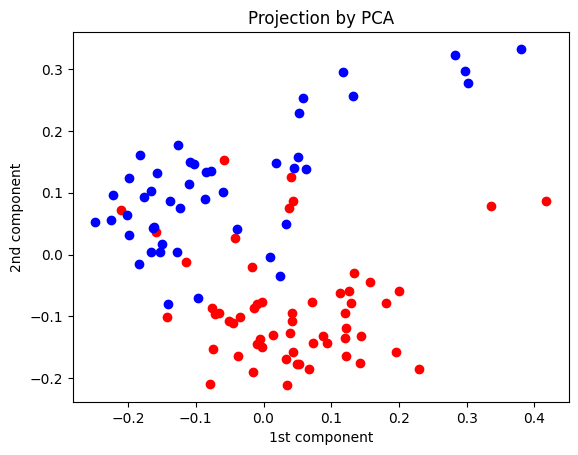

In [10]:
import matplotlib.pyplot as plt

reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Wykres zależności wartości wariancji od numeru kierunku wiodącego k

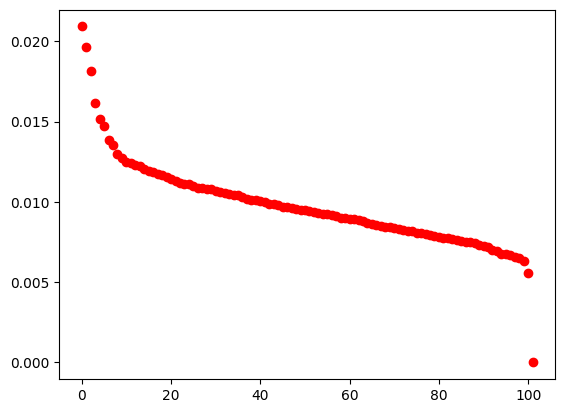

0.157734780290035


In [11]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

# Analiza 04Cars dataset

### Wczytanie danych

In [12]:
df = pd.read_csv('./data/04cars-data.csv', header=0)
data = df.iloc[:, -11:]
attributes = list(data.columns.values)
array = data.values

print(f'Shape of dataset: {data.shape}')
data.head()

Shape of dataset: (387, 11)


,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68


### Normalizacja danych

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(array)
X_scaled[:5]

array([[ 0.5342275 ,  0.47954631,  0.36782701,  0.16320723,  0.15042407,
        -0.44004349, -0.57980621,  0.49290474,  1.10042148,  0.91058658,
         0.21507724],
       [ 0.65326826,  0.59622579,  0.36782701,  0.16320723,  0.15042407,
        -0.44004349, -0.57980621,  0.51134208,  1.10042148,  0.91058658,
         0.21507724],
       [ 0.18852702,  0.16200584,  0.36782701,  0.16320723,  0.72045213,
        -0.63031928, -0.75746655,  1.30272942, -0.17123347,  0.30548333,
         1.70141457],
       [ 2.86986316,  2.77084942,  0.0716778 ,  0.16320723,  1.07671967,
        -0.63031928, -0.57980621, -0.53816802, -1.01900344, -0.82908527,
        -0.08219023],
       [-0.47774592, -0.48549257, -1.11291902, -1.18064808, -0.20584347,
         0.70161124,  0.66381614, -1.07001435, -0.87770844, -0.98036108,
        -0.97399263]])

### PCA

In [15]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Zależność bezwzględnej i względnej wartości wariancji od numeru kierunku wiodącego k

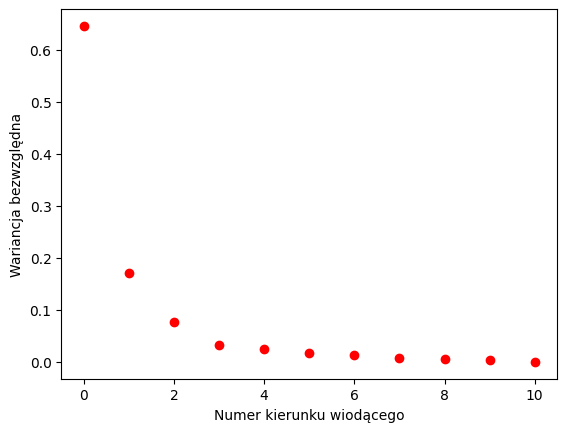

In [16]:
plt.scatter(np.arange(11), pca.explained_variance_ratio_, c='r')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Wariancja bezwzględna')
plt.show()

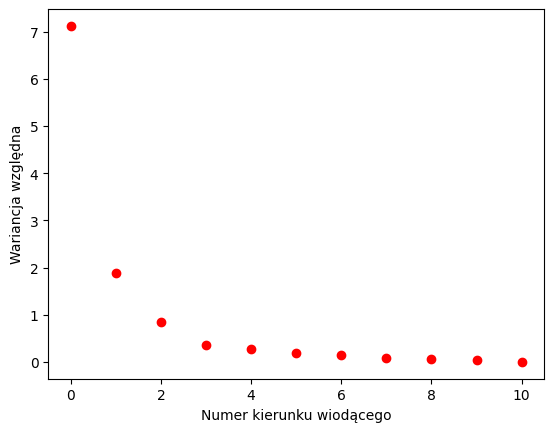

In [17]:
plt.scatter(np.arange(11), pca.explained_variance_, c='r')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Wariancja względna')
plt.show()

**Jaka część wariancji zostaje zachowana przy redukcji wymiarowości do 2 i 3**

Dla 2 głównych komponentów zachowane zostaje około 94% wariancji, a dla 3 około 97%.

### Wartości elementów pierwszego i drugiego komponentu wiodącego wraz z odpowiadającą im nazwą cechy

In [18]:
pc_1 = pca.components_[0]
pc_2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0, pc_1.shape[0]):
    print(attributes[i] + ('\t' if len(attributes[i]) < 8 else '') + '\t' + repr(pc_1[i]) + '\t' + repr(pc_2[i]))

Attribute, PC1, PC2
Retail Price	-0.26375044344403437	0.4685086975025388
Dealer Cost	-0.26231863875309513	0.4701465851382258
Engine Size (l)	-0.34708049202520086	-0.015347186463713525
Cyl		-0.3341887576286371	0.07803201087501871
HP		-0.31860225848402923	0.2922134761391822
City MPG	0.31048172673231283	-0.003365935761659125
Hwy MPG		0.30658863858044444	-0.0109644601453487
Weight		-0.336329366940488	-0.16746357154787037
Wheel Base	-0.26621003357105427	-0.4181771069592042
Len		-0.2567901876706823	-0.40841138066875465
Width		-0.29605459141706114	-0.31289135016250713


**Co oznaczają elementy o wartości bliskiej zeru?**

Wartości bliskie zeru nie cechują samochodów względem danej cechy wiodącej. Będą one na środku wykesu.

**Z jakimi własnościami samochodu wiążą się:**
 - **Największe elementy pierwszego komponentu wiodącego**

Największe komponenty pierwszego wiążą się z zużyciem paliwa na dystans (City MPG)

 - **Najmniejsze elementy pierwszego komponentu wiodącego**

Najmniejsze komponenty pierwszego wiążą się z wagą (Weight), rozmiarem silnika (Engine Size) i liczbą cylindrów (Cyl).

 - **Największe elementy drugiego komponentu wiodącego**

Największe komponenty drugiego wiążą się z ceną (Dealer Cost).

 - **Najmniejsze elementy drugiego komponentu wiodącego**

Najmniejsze komponenty drugiego wiążą się z wymiarami fizycznymi samochodu (Len, Width, Wheel Base).

### Wizualizacji wektorów cech zrzutowanych na 2 pierwsze komponenty wiodące

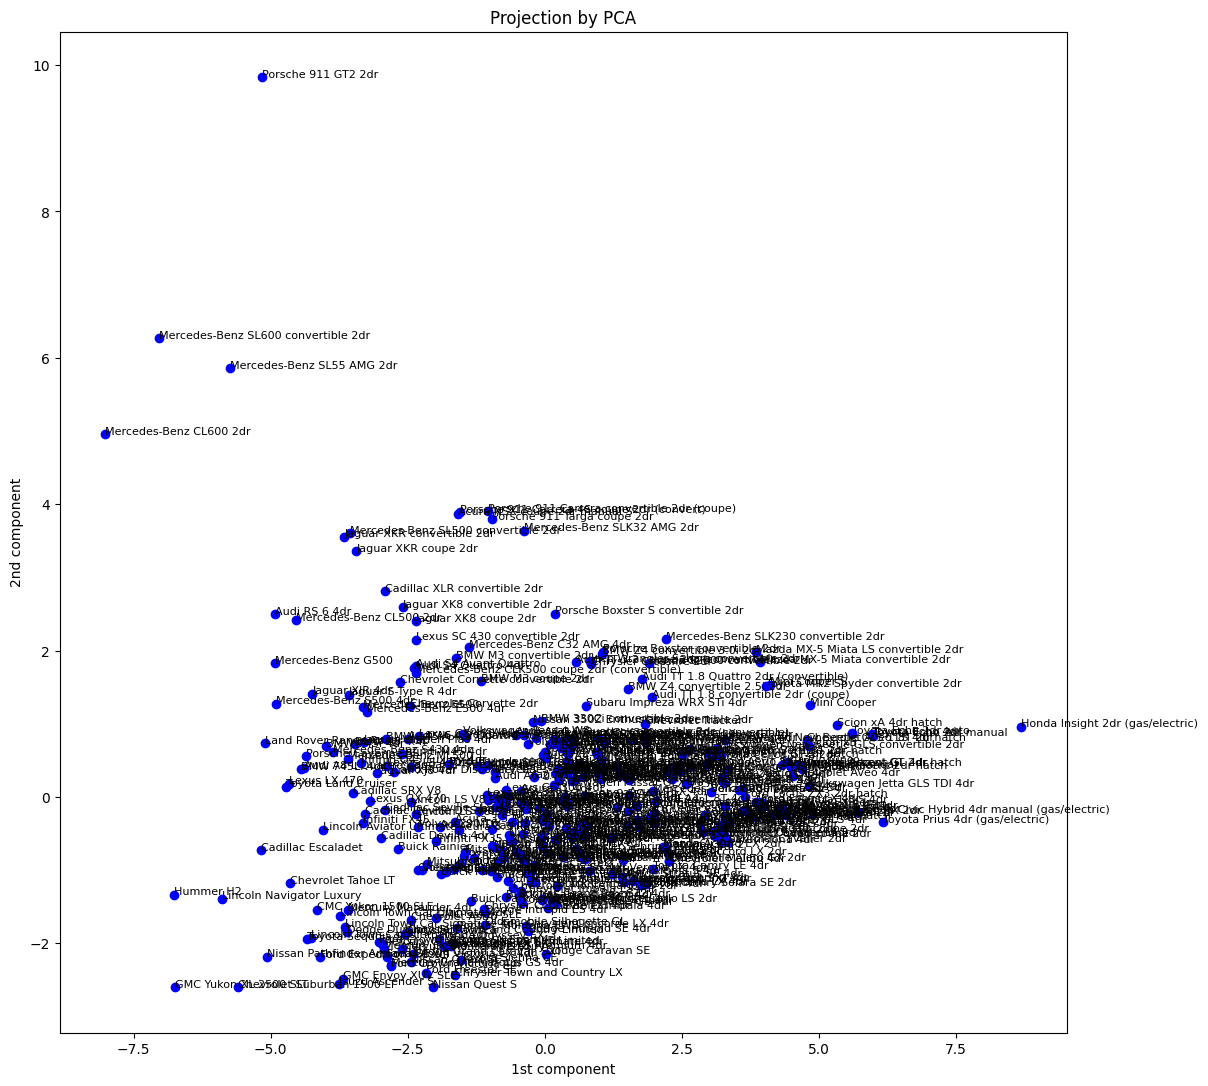

In [19]:
plt.figure(figsize=(13, 13))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b')
for i, txt in enumerate(df.iloc[:, 0]):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Projection by PCA')
plt.show()

**Jakie typy samochodów występują w poszczególnych częściach wykresu?**

Samochody o podobnych cechach wiodących znajdują się w podobnych miejscach na wykresie. Na przykład, na prawo występują samochody o niskim zużyciu paliwa, a na lewo o wysokim. Na górze występują samochody o wysokim koszcie, a na dole o niskim. Dla przykładu, na lewo są samochody elektryczne i hybrydowe, a na prawo zwykłe samochody spalinowe oraz dostawcze. Na górze są samochody sportowe, a na dole zwykłe samochody osobowe.

### Ten sam wykres oraz przedstawiony zbiór danych o zredukowanym rozmiarze wraz z wizualicacją cech zrzutowanych na 2 pierwsze komponenty wiodące

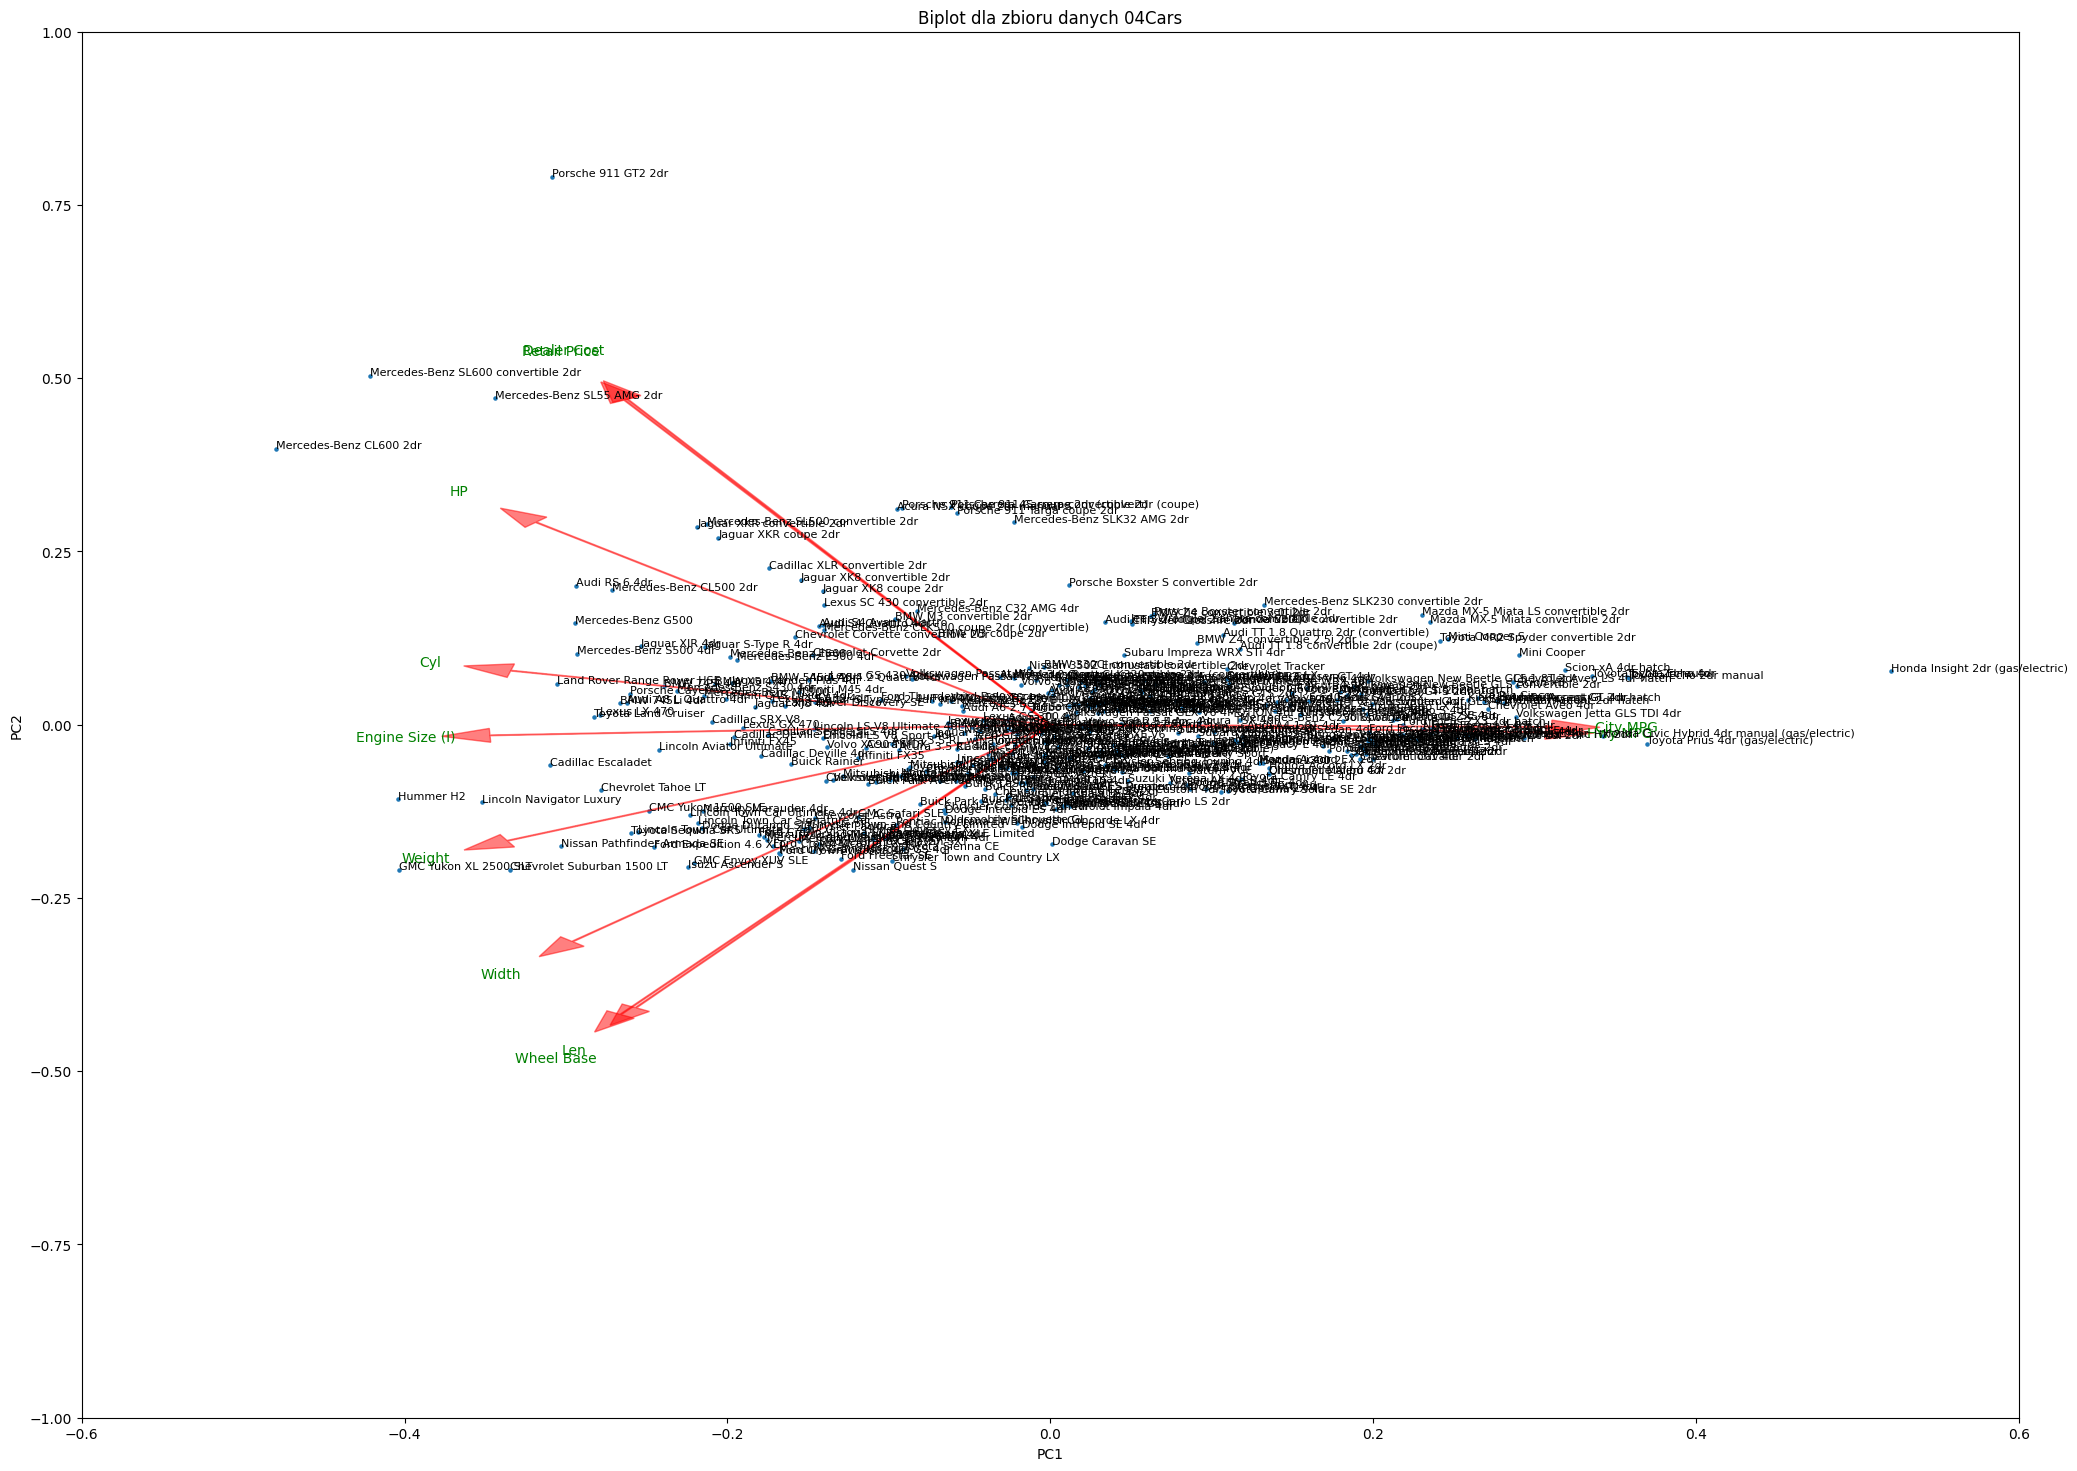

In [20]:
plt.figure(figsize=(25, 18))
n = len(pca.components_)
coeff = np.transpose(pca.components_[0:2, :])

xs = X_pca[:, 0]
ys = X_pca[:, 1]
scale_x = 1.0 / (xs.max() - xs.min())
scale_y = 1.0 / (ys.max() - ys.min())
plt.scatter(xs * scale_x, ys * scale_y, s=5)

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, attributes[i], color='g', ha='center', va='center')

for i, txt in enumerate(df.iloc[:, 0]):
    plt.annotate(txt, (X_pca[i, 0] * scale_x, X_pca[i, 1] * scale_y), fontsize=8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-0.6, 0.6)
plt.ylim(-1.0, 1.0)
plt.title('Biplot dla zbioru danych 04Cars')
plt.show()

**Co pokazuje tego typu wizualizacja?**

Wizualizacja pokazuje zależności między cechami a komponentami wiodącymi. Wartości cech są znormalizowane i zrzutowane na 2 pierwsze komponenty wiodące.

# Budowa eigenfaces w oparciu o zbiór danych LFW

### Wczytanie podzbioru zbioru danych LFW

In [21]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

### Wyświetlenie przykładowych zdjęć

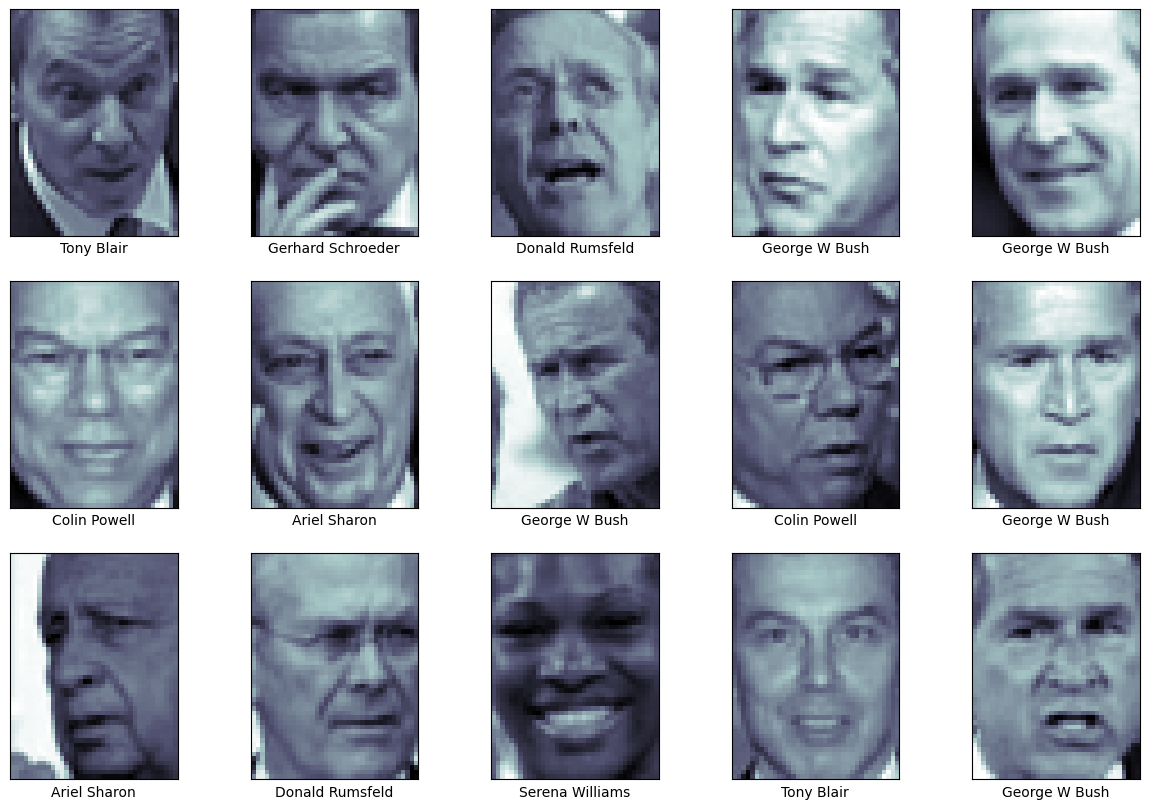

In [22]:
fig, ax = plt.subplots(3, 5, figsize=(15, 10))

for i, ax in enumerate(ax.flat):
    ax.imshow(lfw_people.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[lfw_people.target[i]])

plt.show()

### Podział zbioru danych na część treningową i testową

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size=0.3, random_state=42)

### PCA dla zbioru treningowego i testowego

In [24]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Wytrenowanie dwóch modeli klasyfikacji MLP oraz SVM

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

mlp = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, early_stopping=True)
mlp.fit(X_train_pca, y_train)

svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

### Obliczenie dokładności klasyfikacji uzyskanej dla każdej z 12 klas na zbiorze testowym

In [26]:
from sklearn.metrics import accuracy_score

mlp_pred = mlp.predict(X_test_pca)
svc_pred = svc.predict(X_test_pca)

mlp_accuracy = accuracy_score(y_test, mlp_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f'MLP accuracy: {mlp_accuracy}')
print(f'SVC accuracy: {svc_accuracy}')

MLP accuracy: 0.8141025641025641
SVC accuracy: 0.6901709401709402


In [27]:
from sklearn.metrics import classification_report

mlp_report = classification_report(y_test, mlp_pred, target_names=lfw_people.target_names, zero_division=0)
svc_report = classification_report(y_test, svc_pred, target_names=lfw_people.target_names, zero_division=0)

In [28]:
print(mlp_report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.67      0.72        21
     Colin Powell       0.88      0.88      0.88        77
  Donald Rumsfeld       0.59      0.75      0.66        32
    George W Bush       0.85      0.87      0.86       162
Gerhard Schroeder       0.79      0.73      0.76        30
      Hugo Chavez       0.76      0.62      0.68        21
   Jacques Chirac       0.73      0.47      0.57        17
    Jean Chretien       0.81      0.76      0.79        17
    John Ashcroft       0.84      0.84      0.84        19
Junichiro Koizumi       0.83      0.77      0.80        13
  Serena Williams       0.92      0.92      0.92        13
       Tony Blair       0.78      0.87      0.82        46

         accuracy                           0.81       468
        macro avg       0.80      0.76      0.78       468
     weighted avg       0.82      0.81      0.81       468



In [29]:
print(svc_report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.38      0.52        21
     Colin Powell       0.73      0.88      0.80        77
  Donald Rumsfeld       0.59      0.53      0.56        32
    George W Bush       0.65      0.96      0.78       162
Gerhard Schroeder       0.58      0.37      0.45        30
      Hugo Chavez       0.83      0.24      0.37        21
   Jacques Chirac       0.00      0.00      0.00        17
    Jean Chretien       0.91      0.59      0.71        17
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.82      0.69      0.75        13
  Serena Williams       1.00      0.92      0.96        13
       Tony Blair       0.72      0.61      0.66        46

         accuracy                           0.69       468
        macro avg       0.64      0.51      0.55       468
     weighted avg       0.65      0.69      0.64       468



### Jak zmieniają się uzyskane wyniki w przypadku redukcji do 50 wymiarów?

In [30]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, early_stopping=True)
mlp.fit(X_train_pca, y_train)

svc = SVC()
svc.fit(X_train_pca, y_train)

mlp_pred = mlp.predict(X_test_pca)
svc_pred = svc.predict(X_test_pca)

In [31]:
mlp_report = classification_report(y_test, mlp_pred, target_names=lfw_people.target_names, zero_division=0)
svc_report = classification_report(y_test, svc_pred, target_names=lfw_people.target_names, zero_division=0)

In [32]:
print(mlp_report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.57      0.67        21
     Colin Powell       0.84      0.87      0.85        77
  Donald Rumsfeld       0.56      0.69      0.62        32
    George W Bush       0.79      0.88      0.84       162
Gerhard Schroeder       0.54      0.50      0.52        30
      Hugo Chavez       0.70      0.67      0.68        21
   Jacques Chirac       0.88      0.41      0.56        17
    Jean Chretien       0.61      0.65      0.63        17
    John Ashcroft       0.90      0.47      0.62        19
Junichiro Koizumi       0.92      0.92      0.92        13
  Serena Williams       0.92      0.85      0.88        13
       Tony Blair       0.69      0.67      0.68        46

         accuracy                           0.76       468
        macro avg       0.76      0.68      0.71       468
     weighted avg       0.76      0.76      0.75       468



In [33]:
print(svc_report)

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.29      0.41        21
     Colin Powell       0.72      0.84      0.78        77
  Donald Rumsfeld       0.59      0.50      0.54        32
    George W Bush       0.64      0.95      0.76       162
Gerhard Schroeder       0.56      0.33      0.42        30
      Hugo Chavez       0.83      0.24      0.37        21
   Jacques Chirac       1.00      0.06      0.11        17
    Jean Chretien       0.92      0.71      0.80        17
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.82      0.69      0.75        13
  Serena Williams       0.92      0.92      0.92        13
       Tony Blair       0.64      0.54      0.59        46

         accuracy                           0.67       468
        macro avg       0.70      0.51      0.54       468
     weighted avg       0.67      0.67      0.63       468



Możemy zauważyć, że dla:
 - MLP wyniki średnie dla precision, recall oraz f1 score są lepsze dla większej liczby komponentów, w tym przypadku dla 100
 - SVC wyniki są lepsze dla mniejszej liczby komponentów, w tym przypadku dla 50

### Wybierz optymalną wymiarowość w oparciu o scree plot.

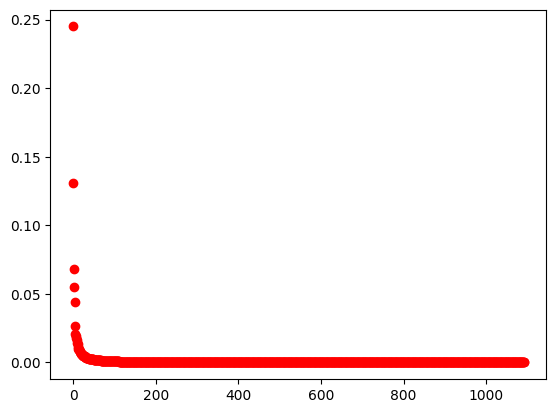

In [34]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

Optymalna wymiarowość, patrząc na wykres scare plot to 100, ponieważ wtedy zachowujemy około 90% wariancji.

### Wyświetlenie 20 pierwszych komponentów głównych (po uprzednim przeskalowaniu) w formie obrazu w skali szarości (eigenfaces)

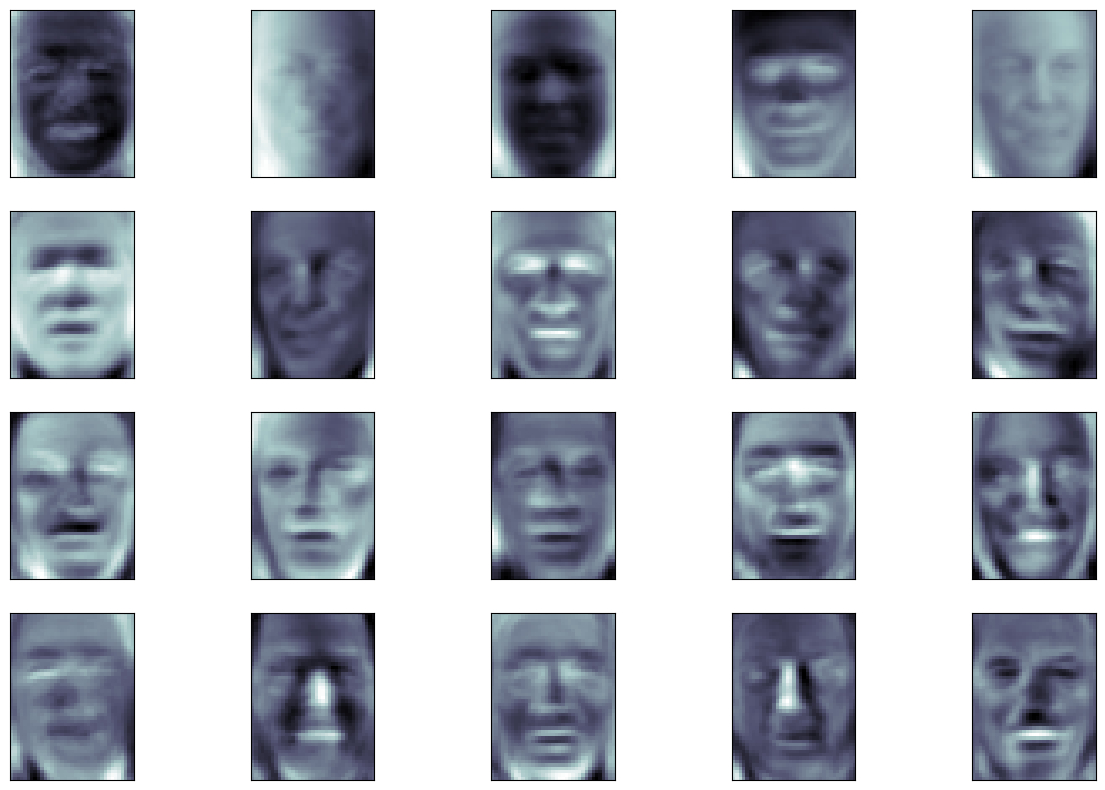

In [35]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))

for i, ax in enumerate(ax.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='bone')
    ax.set(xticks=[], yticks=[])

plt.show()

**W jaki sposób można zinterpretować działanie eigenfaces w kontekście redukcji wymiarowości wcześniej niewidzianego zdjęcia (przykładu testowego)?**

Działanie eigenfaces w kontekście redukcji wymiarowości wcześniej niewidzianego zdjęcia, polega na zrzutowaniu zdjęcia na 100 pierwszych komponentów a następnie na odwrotnym przekształceniu na oryginalne wymiary. W ten sposób uzyskujemy zredukowane zdjęcie, które jest reprezentacją oryginalnego zdjęcia. Możemy na nim zaobserwować, które cechy są najbardziej istotne dla poszczególnych komponentów jak np. nos, oczodoły czy usta.

**Jakie cechy ekstrahują poszczególe eigenfaces?**

Poszczególne eigenfaces ekstrahują cechy twarzy, takie jak nos, oczy, usta, broda, czoło, policzki, itp.